In [3]:
# /1 OneHot encoding
# 2/ Analyser les repartitions de mes targets
# 3/ RMSE/R2 score / MAE
# 4/ verifier la coherence en affichant la coherence

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [12]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1648, 29)

In [ ]:
visualiser les targets pour transformation logarithmique par ex

In [21]:
np.isfinite(df.all())

BuildingType                       True
PrimaryPropertyType                True
ZipCode                            True
CouncilDistrictCode                True
Latitude                           True
Longitude                          True
YearBuilt                          True
NumberofBuildings                  True
NumberofFloors                     True
PropertyGFATotal                   True
PropertyGFAParking                 True
PropertyGFABuilding(s)             True
LargestPropertyUseTypeGFA          True
SecondLargestPropertyUseTypeGFA    True
ThirdLargestPropertyUseTypeGFA     True
ENERGYSTARScore                    True
SiteEUIWN(kBtu/sf)                 True
SourceEUIWN(kBtu/sf)               True
SiteEnergyUseWN(kBtu)              True
SteamUse(kBtu)                     True
Electricity(kBtu)                  True
NaturalGas(kBtu)                   True
TotalGHGEmissions                  True
GHGEmissionsIntensity              True
ProportionParkingGFA               True


In [13]:
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

# select non numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [14]:
# dummies = pd.get_dummies(x.PrimaryPropertyType)
# # concatation of independent variables and new cateorical variable.
# x1= x.join(dummies).drop('PrimaryPropertyType', axis=1)
# x1

In [15]:
df

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,Electricity(kBtu/sf),NaturalGas(kBtu/sf),SteamUse(kBtu/sf),Waste_energy(kBtu/sf)
0,1,2,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,...,0.268728,0.529177,0.171177,249.98,2.83,0.0,44.679002,14.331001,22.653787,0.553968
1,1,2,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,...,0.000000,0.374270,0.593813,295.86,2.86,0.0,36.223001,57.761001,0.000000,0.454292
2,1,2,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,...,0.291688,0.669849,0.020204,2089.28,2.19,0.0,65.458998,1.954000,28.497899,0.599754
3,1,2,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,...,0.318772,0.398590,0.260726,286.43,4.67,0.0,45.320001,29.458001,36.116880,0.494196
4,1,2,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,...,0.000000,0.366295,0.600689,505.01,2.88,0.0,43.918999,71.219998,0.000000,0.449443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2,9,0.0,2,47.56722,-122.31154,1990,1.0,1,12294,...,0.000000,0.555959,0.345147,20.94,1.70,0.0,42.951998,26.844999,0.000000,0.564452
1644,2,10,0.0,2,47.59625,-122.32283,2004,1.0,1,16000,...,0.000000,0.376335,0.525507,32.17,2.01,0.0,25.042001,34.927001,0.000000,0.445753
1645,2,10,0.0,7,47.63644,-122.35784,1974,1.0,1,13157,...,0.000000,0.296040,0.656408,223.54,16.99,0.0,138.030002,303.666004,0.000000,0.400755
1646,2,8,0.0,1,47.52832,-122.32431,1989,1.0,1,14101,...,0.000000,0.445646,0.473405,22.11,1.57,0.0,24.975000,26.085000,0.000000,0.499097


[ACTION] Nous allons séparer les variables indépendantes (labels) de la variable target:

In [16]:
x = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity',
                       'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode'], axis=1, inplace=False)
x

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ProportionParkingGFA,Electricity(kBtu/sf),NaturalGas(kBtu/sf),SteamUse(kBtu/sf),Waste_energy(kBtu/sf)
0,1,2,98101.0,7,1927,1.0,12,88434,0,88434,88434.0,60.0,0.268728,0.529177,0.171177,0.0,44.679002,14.331001,22.653787,0.553968
1,1,2,98101.0,7,1996,1.0,11,103566,15064,88502,83880.0,61.0,0.000000,0.374270,0.593813,0.0,36.223001,57.761001,0.000000,0.454292
2,1,2,98101.0,7,1969,1.0,41,956110,196718,759392,756493.0,43.0,0.291688,0.669849,0.020204,0.0,65.458998,1.954000,28.497899,0.599754
3,1,2,98101.0,7,1926,1.0,10,61320,0,61320,61320.0,56.0,0.318772,0.398590,0.260726,0.0,45.320001,29.458001,36.116880,0.494196
4,1,2,98121.0,7,1980,1.0,18,175580,62000,113580,123445.0,75.0,0.000000,0.366295,0.600689,0.0,43.918999,71.219998,0.000000,0.449443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2,9,0.0,2,1990,1.0,1,12294,0,12294,12294.0,46.0,0.000000,0.555959,0.345147,0.0,42.951998,26.844999,0.000000,0.564452
1644,2,10,0.0,2,2004,1.0,1,16000,0,16000,16000.0,73.0,0.000000,0.376335,0.525507,0.0,25.042001,34.927001,0.000000,0.445753
1645,2,10,0.0,7,1974,1.0,1,13157,0,13157,7583.0,73.0,0.000000,0.296040,0.656408,0.0,138.030002,303.666004,0.000000,0.400755
1646,2,8,0.0,1,1989,1.0,1,14101,0,14101,6601.0,73.0,0.000000,0.445646,0.473405,0.0,24.975000,26.085000,0.000000,0.499097


In [17]:
# target1_siteEUIWN = df['SiteEUIWN(kBtu/sf)']

# target2_sourceEUIWN = df['SourceEUIWN(kBtu/sf)']

target3_siteEnergyuse = df['SiteEnergyUseWN(kBtu)']

target4_totalGHGemissions = df['TotalGHGEmissions']

# target5_GHGemissionIntensity = df['GHGEmissionsIntensity']


## Linear Regression

In [18]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, target3_siteEnergyuse, test_size=0.33)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
r2score = r2_score(y_test,yhat)
rmse = mean_squared_error(y_test, yhat, squared=False)
baseline_error = np.mean((yhat - y_test) ** 2)
print('MAE: %.3f' % mae)
print('R2SCORE: %.3f' % r2score)
print('RMSE: %.3f' % rmse)
print(baseline_error)

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [88]:
print(model.coef_)

[ 1.14583450e+01  3.80984359e+04  1.84230415e+05 -3.70181980e+04
 -4.75221257e+03  3.30460325e+05 -8.64001564e+04 -5.54645155e+00
 -3.95266409e+00  9.72003412e+00 -5.01340627e+03  9.07089511e-01
  2.71378799e+05 -7.95354879e+04 -1.03899091e+07  1.03899970e+05
  9.26801590e+03]


## Ridge & Lasso Regression

In [35]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
# gradientboosting - à utiliser & gradient Forest

faire un plot qui represente mes predictions vs la vrais valeurs- superpose y test vs les vrai valeurs (y pred)
prédire releve de conso = etude de regression


In [36]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(x1.shape[1]-30, x1.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(x1, target6_siteEnergyuse)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# ajouter l'affichage du r score / RMSE
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -393943560228813.625
Best Config: {'sel__k': 33}
>-627836696492719.375 with: {'sel__k': 9}
>-627937736178334.375 with: {'sel__k': 10}
>-633014714918919.625 with: {'sel__k': 11}
>-641773768442654.750 with: {'sel__k': 12}
>-650772405307277.375 with: {'sel__k': 13}
>-509485747777151.312 with: {'sel__k': 14}
>-556248838113746.062 with: {'sel__k': 15}
>-470254224361028.438 with: {'sel__k': 16}
>-412498905026898.250 with: {'sel__k': 17}
>-404515289084092.875 with: {'sel__k': 18}
>-404758709608704.938 with: {'sel__k': 19}
>-404908603882750.812 with: {'sel__k': 20}
>-404903785592715.812 with: {'sel__k': 21}
>-404723519881877.188 with: {'sel__k': 22}
>-403900307388305.000 with: {'sel__k': 23}
>-401686926849844.250 with: {'sel__k': 24}
>-408868913361469.812 with: {'sel__k': 25}
>-404747165178084.438 with: {'sel__k': 26}
>-397679951633625.875 with: {'sel__k': 27}
>-398073774675612.562 with: {'sel__k': 28}
>-394987778178497.000 with: {'sel__k': 29}
>-393950542785329.438 with: {'sel__k': 

In [89]:
# from sklearn import linear_model
# import numpy as np
#
# X_train, X_test, y_train, y_test = train_test_split(x_numeric, target6_siteEnergyuse, test_size=0.33)
# # On crée un modèle de régression linéaire
# lr = linear_model.LinearRegression()
#
# # On entraîne ce modèle sur les données d'entrainement
# lr.fit(X_train,y_train)
#
# # On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
# baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
# mae = mean_absolute_error(y_test, yhat)
# r2score = r2_score(y_test,yhat)
# rmse = mean_squared_error(y_test, yhat, squared=False)
#
# print(baseline_error)
# print('MAE: %.3f' % mae)
# print('R2SCORE: %.3f' % r2score)
# print('RMSE: %.3f' % rmse)

In [90]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [91]:
from sklearn.linear_model import Ridge
ridge = Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=3.31264e-21): result may not be accurate.

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=3.77591e-21): result may not be accurate.

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=8.49994e-21): result may not be accurate.

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=5.22742e-21): result may not be accurate.

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning:

Ill-conditioned matrix (rcond=2.36066e-21): result may not be accurate.

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge

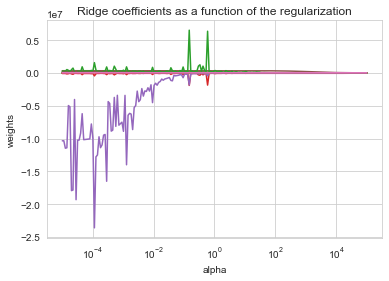

<Figure size 3600x3600 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.figure(figsize=(50,50))
plt.show()

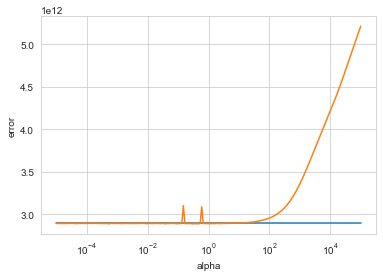

In [95]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [96]:
min(errors)

[2891853341943.3022, 2886843912334.816]

In [97]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.725e+14, tolerance: 1.127e+14

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.725e+14, tolerance: 1.127e+14

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.725e+14, tolerance: 1.127e+14

/Users/maurelco/opt/an

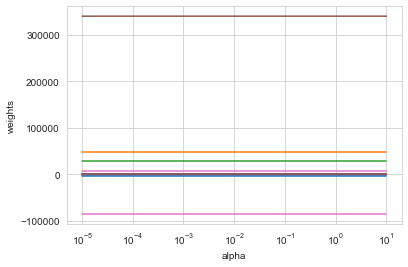

In [98]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [99]:
min(errors)

[2891853341943.3022, 2887743715272.1084]